# txtファイルの読み込み及びファイル作成のテスト

In [1]:
import os
import re
import matplotlib.pyplot as plt

In [2]:


# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

from src import OpenFile as of
from src import MSreader


In [3]:
# 出力用フォルダの作成
path_output_folder=of.make_folder("output")
path_output_folder


Folder 'output' already exists in '.'.


'.\\output'

In [4]:
# 入力ファイルの指定
path_input_folder="input"
name_input= "case60g02out.ms8"
path_input_data= os.path.join(path_input_folder, name_input)



In [5]:
# 入力ファイルの読み込み
with open(path_input_data, "r") as f:
    data_txt = f.read()


In [6]:
#改行ごとに分割
list_preset, list_isteprow = MSreader.separate_stepblock(data_txt)
list_isteprow[0]

[' istep =      39890 time  =  5.618E-03',
 ' ----- maximum velocity data -----',
 'ulmax= 8.40072E+00 @(  28,   3, 324) vlmax= 7.96686E+00 @(  28,   1, 323) wlmax= 2.20888E+01 @(  30,   1, 330)',
 'ugmax= 8.40072E+00 @(  28,   3, 324) vgmax= 7.96686E+00 @(  28,   1, 323) wgmax= 2.20888E+01 @(  30,   1, 330)',
 ' ----- maximum and minimum data of pres.               and temp. -----',
 'pmax= 1.09070E+05 @(  37,   7,   5) pmin= 9.99419E+04 @(  34,   3, 474)',
 'tmax= 3.56895E+02 @(  33,   3, 325) tmin= 2.73150E+02 @(   1,   1,   3)',
 ' ----- maximum density of both phases -----',
 'r1max= 1.07437E+05 @(  25,  10, 144) r2max= 1.42601E+00 @(  16,   2, 136)',
 ' time step reduced by CSF limit',
 ' time step reduced by CSF limit',
 ' time step reduced by CSF limit',
 ' time step reduced by CSF limit',
 ' time step reduced by CSF limit',
 ' time step reduced by CSF limit',
 ' time step reduced by CSF limit',
 ' time step reduced by CSF limit',
 ' time step reduced by CSF limit',
 ' time ste

In [7]:
list_labels= [ ["time"], ["tmin", "tmax"], ["pmin", "pmax"], ["wlmax", "wgmax"] ]
list_labels_1d=[p for list_l in list_labels for p in list_l ]
list_labels_1d


['time', 'tmin', 'tmax', 'pmin', 'pmax', 'wlmax', 'wgmax']

In [8]:
list_istep=[]
list_time = []
list_wlmax=[]
list_wgmax=[]
list_pmax=[]
list_pmin=[]
list_tmax=[]
list_tmin=[]

for p in list_isteprow:
    list_value_i=[]
    istep = MSreader.extract_values(p, "istep")[0]

    
    for label in list_labels_1d:
        # print(label)
        list_value_i.append(MSreader.extract_values(p,label)[0])
    # print(list_value_i)

    if None in list_value_i :
        print("istep stopped at:", istep)
        break


    time_values = MSreader.extract_values(p,"time")

        
    list_istep.append(istep)
    list_time.append(list_value_i[0])
    list_tmin.append(list_value_i[1])
    list_tmax.append(list_value_i[2])
    list_pmin.append(list_value_i[3])
    list_pmax.append(list_value_i[4])
    list_wlmax.append(list_value_i[5])
    list_wgmax.append(list_value_i[6])

    # print("istep: ",istep)

istep stopped at: 172890


# その他のパラメータ抽出

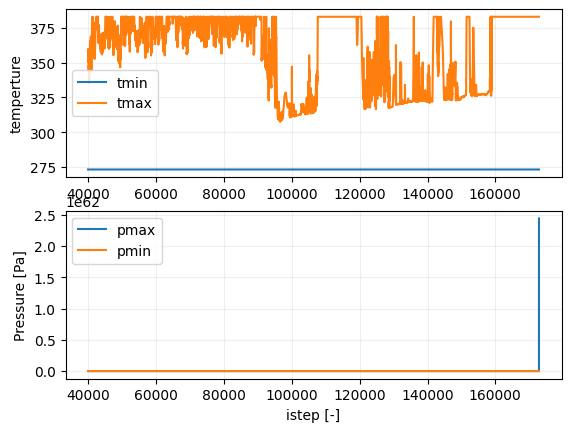

In [9]:

fig, ax = plt.subplots(2,1)
ax1=ax[0]
ax2=ax[1]

ax1.plot(list_istep,list_tmin,label='tmin')
ax1.plot(list_istep, list_tmax,label='tmax')
# ax1.set_title("IstepVsParameter")
# ax1.set_xlabel("istep [-]")
ax1.set_ylabel("temperture")
ax1.grid(alpha=0.2)
ax1.legend()

ax2.plot(list_istep,list_pmax,label='pmax')
ax2.plot(list_istep,list_pmin,label='pmin')
# ax2.set_title("IstepVsParameter")
ax2.set_xlabel("istep [-]")
ax2.set_ylabel("Pressure [Pa]")
ax2.grid(alpha=0.2)
ax2.legend()
plt.show()

time
tmin
tmax
pmin
pmax
wlmax
wgmax


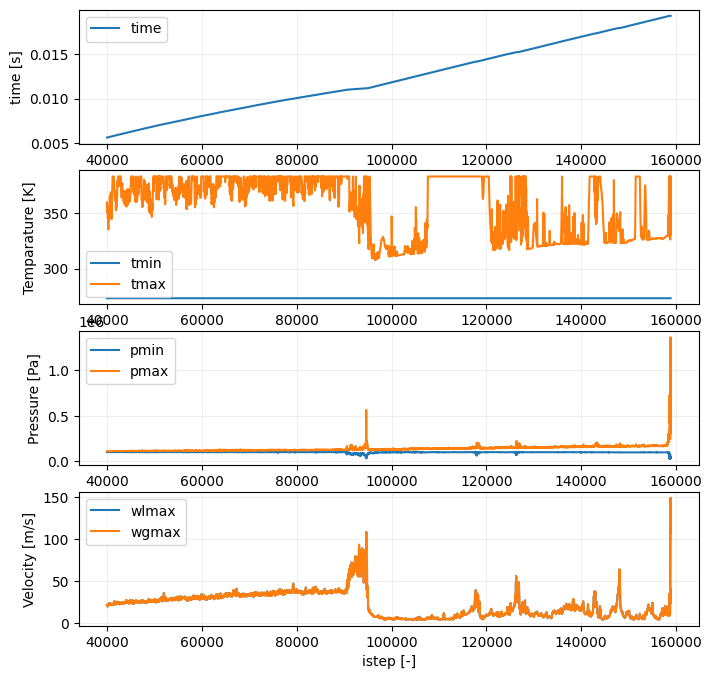

In [10]:
list_istep
list_values= [ [list_time],[list_tmin,list_tmax], [list_pmin,list_pmax], [list_wlmax, list_wgmax]]
list_labels= [ ["time"], ["tmin", "tmax"], ["pmin", "pmax"], ["wlmax", "wgmax"] ]
list_ylabel= [ "time [s]", "Temparature [K]", "Pressure [Pa]", "Velocity [m/s]" ]

range_istep=[0,-1400]

# パラメータの数だけグラフを作成
fig, ax = plt.subplots(len(list_values),1, figsize=(8,2*len(list_values)))

for i, (values,labels) in enumerate(zip(list_values,list_labels) ):
    is_dt=0
    j=i+is_dt
    ax_i= ax[j]

    ax_i.set_ylabel(list_ylabel[j])

    for (value,label) in zip(values,labels):
        print(label)
        ax_i.plot(list_istep[range_istep[0]:range_istep[1]],
                  value[range_istep[0]:range_istep[1]]
                  ,label=label)
        # ax_i.set_title("IstepVsParameter")
        # ax_i.set_xlabel("istep [-]")
        ax_i.grid(alpha=0.2)
        ax_i.legend()
    
    # if labels[0] == "time":
    #     is_dt =1
    #     list_istep_tmp =list_istep[1:]
    #     list_dt= np.diff( np.array(list_time) )
    #     ax_i.plot(list_istep_tmp[range_istep[0]:range_istep[1]],
    #         value[range_istep[0]:range_istep[1]]
    #         ,label=label)
    #     # ax_i.set_title("IstepVsParameter")
    #     # ax_i.set_xlabel("istep [-]")
    #     ax_i.grid(alpha=0.2)
    #     ax_i.legend()

    if i == len(list_values)-1 :
        ax_i.set_xlabel("istep [-]")
plt.show()

In [16]:
list_labels= [ ["tmin", "tmax"], ["pmin", "pmax"], ["wlmax", "wgmax"] ]
list_labels_1d=[p for list_l in list_labels for p in list_l ]
list_labels_1d

['tmin', 'tmax', 'pmin', 'pmax', 'wlmax', 'wgmax']

In [27]:
list_istep=[]
list_time = []
list_wlmax=[]
list_wgmax=[]
list_pmax=[]
list_pmin=[]
list_tmax=[]
list_tmin=[]

list_wlmax_posi=[]
list_wgmax_posi=[]
list_pmax_posi=[]
list_pmin_posi=[]
list_tmax_posi=[]
list_tmin_posi=[]


for p in list_isteprow:
    list_value_i=[]
    posi_i = []
    istep = MSreader.extract_values(p, "istep")[0]

    
    for label in list_labels_1d:
        # print(label)
        values_tmp, posi_tmp= MSreader.extract_values_with_posi(p,label)
        list_value_i.append(values_tmp[0])
        posi_i.append(posi_tmp[0])

    # print(list_value_i)

    if None in list_value_i :
        print("istep stopped at:", istep)
        break

    
    time_values = MSreader.extract_values(p,"time")[0]

        
    list_istep.append(istep)
    list_time.append(time_values)
    list_tmin.append(list_value_i[0])
    list_tmax.append(list_value_i[1])
    list_pmin.append(list_value_i[2])
    list_pmax.append(list_value_i[3])
    list_wlmax.append(list_value_i[4])
    list_wgmax.append(list_value_i[5])

    list_tmin_posi.append(posi_i[0])
    list_tmax_posi.append(posi_i[1])
    list_pmin_posi.append(posi_i[2])
    list_pmax_posi.append(posi_i[3])
    list_wlmax_posi.append(posi_i[4])
    list_wgmax_posi.append(posi_i[5])


    # print("istep: ",istep)

istep stopped at: 172890


In [28]:
list_tmin_posi

[(1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (28, 2, 323),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (29, 2, 323),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (28, 14, 428),
 (33, 2, 387),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (28, 2, 323),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (28, 14, 428),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (28, 2, 323),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (29, 2, 323),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (29, 3, 323),
 (29, 1, 323),
 (1, 1, 3),
 (1, 1, 3),
 (32, 2, 323),
 (28, 2, 439),
 (1, 1, 3),
 (1, 1, 3),
 (1, 1, 3),
 (29, 1, 323),